## Atividade 02 de Projeto Integrado por Computador

#### Tema: Modelagem de uma bomba de calor

---

Aluno: Abner Vieira Pereira

## Enunciado

O refrigerante R-134a entra no condensador de uma bomba de calor residencial a 800 kPa e 55°C com uma taxa de 0,018 kg/s e sai a 750 kPa, sub-resfriado em 3°C. O refrigerante entra no compressor a 200 kPa superaquecido em 4°C.

Determine (a) a eficiência isentrópica do compressor, (b) a taxa de calor fornecida ao ambiente aquecido e (c) o COP (coeficiente de performance) da bomba de calor.

Além disso, determine (d) o COP e a taxa de calor fornecida ao ambiente aquecido se esta bomba de calor operasse no ciclo de compressão de vapor ideal entre os limites de pressão de 200 e 800 kPa.

In [17]:
from numpy import *
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from IPython.display import Math

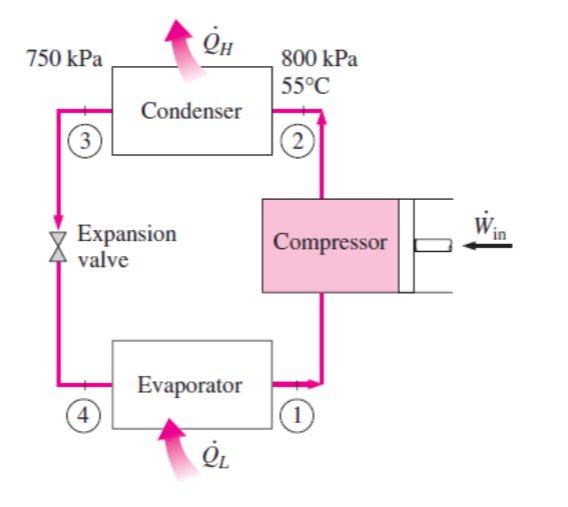

In [18]:
Image('ciclo_refri.png')

## Estado 1 - Entrada do compressor

Nesse estado, o fluido refrigerante entra a uma pressão de 200kPa, superaquecido a uma temperatura de 4°C.

In [19]:
# Declarando variáveis para o primeiro estado
P1 = 200e3
Q1 = 1

In [20]:
T1_sat = CP.PropsSI('T','P',P1,'Q',Q1,'R134a')
T1_sat_C = T1_sat - 273.15
display(Math(r'T_{1,sat} = %.3f \, °C.' %T1_sat_C))

<IPython.core.display.Math object>

In [21]:
T1_Real = T1_sat + 4
T1_C_Real = T1_Real - 273.15
display(Math(r'T_{1,real} = %.3f \,°C.' %T1_C_Real))

<IPython.core.display.Math object>

In [22]:
h1 = CP.PropsSI('H','T',T1_Real,'P',P1,'R134a')
h1_conv = h1/1000
h1_conv = np.round(h1_conv,3)
display(Math(r'h_{1} = %.3f \,kJ/kg.' %h1_conv))

<IPython.core.display.Math object>

In [23]:
s1 = CP.PropsSI('S','T',T1_Real,'P',P1,'R134a')
s1_conv = s1/1000
display(Math(r's_{1} = %.3f \, kJ/kg°C' %s1_conv))

<IPython.core.display.Math object>

## Estado 2 - Entrada do condensador

Nesse estado, a pressão é 800 kPa, a temperatura é 55°C e a entropia é igual a entropia do estado 1, uma vez que essa transformação é isoentrópica.

In [24]:
s2 = s1
P2 = 800e3
T2 = 328.15  #273.15 + 55

In [25]:
h2 = CP.PropsSI('H','T',T2,'P',P2,'R134a')
h2_conv = h2/1000
display(Math(r'h_{2} = %.3f \, kJ/kg' %h2_conv))

<IPython.core.display.Math object>

In [52]:
h2_s = CP.PropsSI('H','P',P2,'S',s1,'R134a')
h2_s_conv = h2_s/1000
display(Math(r'h_{2,s} = %.3f \, kJ/kg' %h2_s_conv))

<IPython.core.display.Math object>

### Eficiência Isoentrópica 

A eficiência isoentrópica é dada por:

$$\eta_c = \dfrac{h_{2s} - h_1}{h_2 - h_1}$$

In [62]:
eta = (h2_s_conv - h1_conv) / (h2_conv - h1_conv)
eta *= 100
display(Math(r'\eta_c = %.3f \%% \,'%eta))

<IPython.core.display.Math object>

## Estado 3 - Entrada da válvula de expansão

Na saída do condensador a pressão é de 750 kPa e está sub-resfriado em 3°C.


In [28]:
P3 = 750e3
Q3 = 0 

In [63]:
T3_sat = CP.PropsSI('T','P',P3,'Q',Q3,'R134a')
T3_sat_C = T3_sat - 273.15
display(Math(r'T_{3,sat} = %.3f \, °C'%T3_sat_C))

<IPython.core.display.Math object>

In [64]:
T3_real = T3_sat - 3
T3_real_C = T3_real - 273.15
display(Math(r'T_{3,real} = %.3f \, °C'%T3_real_C))

<IPython.core.display.Math object>

In [65]:
h3 = CP.PropsSI('H','T',T3_real,'P',P3,'R134a')
h3_conv = h3/1000
display(Math(r'h_{3} = %.3f \, kJ/kg '%h3_conv))

<IPython.core.display.Math object>

In [66]:
s3 = CP.PropsSI('S','T',T3_real,'P',P3,'R134a')
s3_conv = s3/1000
display(Math(r's_{3} = %.3f \, kJ/kg' %s3_conv))

<IPython.core.display.Math object>

## Estado 4 - Entrada do evaporador

Nesse estado a pressão é igual a pressão do estado 1 e a entalpia é a mesma do estado 3.



In [33]:
h4 = h3
P4 = P1

In [67]:
T4 = CP.PropsSI('T','P',P4,'H',h4,'R134a')
T4 = T4 - 273.15
display(Math(r'T_{4} = %.3f \, °C'%T4))

<IPython.core.display.Math object>

In [68]:
s4 = CP.PropsSI('S','P',P4,'H',h4,'R134a')
s4_conv = s4/1000
display(Math(r's_{4} = %.3f \, kJ/kg°C'%s4_conv))

<IPython.core.display.Math object>

In [69]:
Q4 = CP.PropsSI('Q','P',P4,'H',h4,'R134a')
display(Math(r'Q_{4} = %.3f'%Q4))

<IPython.core.display.Math object>

### Calor do condensador

Para determinar a taxa de calor fornecido ao ambiente aquecido é dado por:

$$\dot{Q}_{cond} = \dot{m}(h_2 - h_3)$$

In [37]:
m_ponto = 0.018

In [77]:
Q_cond = m_ponto * (h2_conv - h3_conv)
display(Math(r'\dot{Q}_{cond} = %.3f \, kW'%Q_cond))

<IPython.core.display.Math object>

### Calor do evaporador

Para determinar a taxa de transferência de calor pela unidade evaporadora usa-se a seguinte fórmula:

$$\dot{Q}_{evap} = \dot{m}(h_1 - h_4)$$

In [76]:
Q_evap = m_ponto * (h1_conv - (h4/1000))
display(Math(r'\dot{Q}_{evap} = %.3f \, kW'%Q_evap))

<IPython.core.display.Math object>

### Potência do compressor

A potência do compressor é dado por:

$$\dot{W}_{comp} = \dot{m}(h_2 - h_1)$$

In [72]:
W_comp = m_ponto*(h2_conv - h1_conv)
display(Math(r'\dot{W}_{comp} = %.3f kW'%W_comp))

<IPython.core.display.Math object>

### Coeficiente de performace

O coefciente de performace (COP) é dado pela seguinte razão:

$$COP = \dfrac{\dot{Q}_{cond}}{W_{comp}}$$

In [73]:
COP = Q_cond/W_comp
display(Math(r'COP = %.3f'%COP))

<IPython.core.display.Math object>

### Plotagem do gráfico P-h:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20376\2837973244.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([h1_conv,h2_conv,h3_conv,(h4/1000),h1_conv],


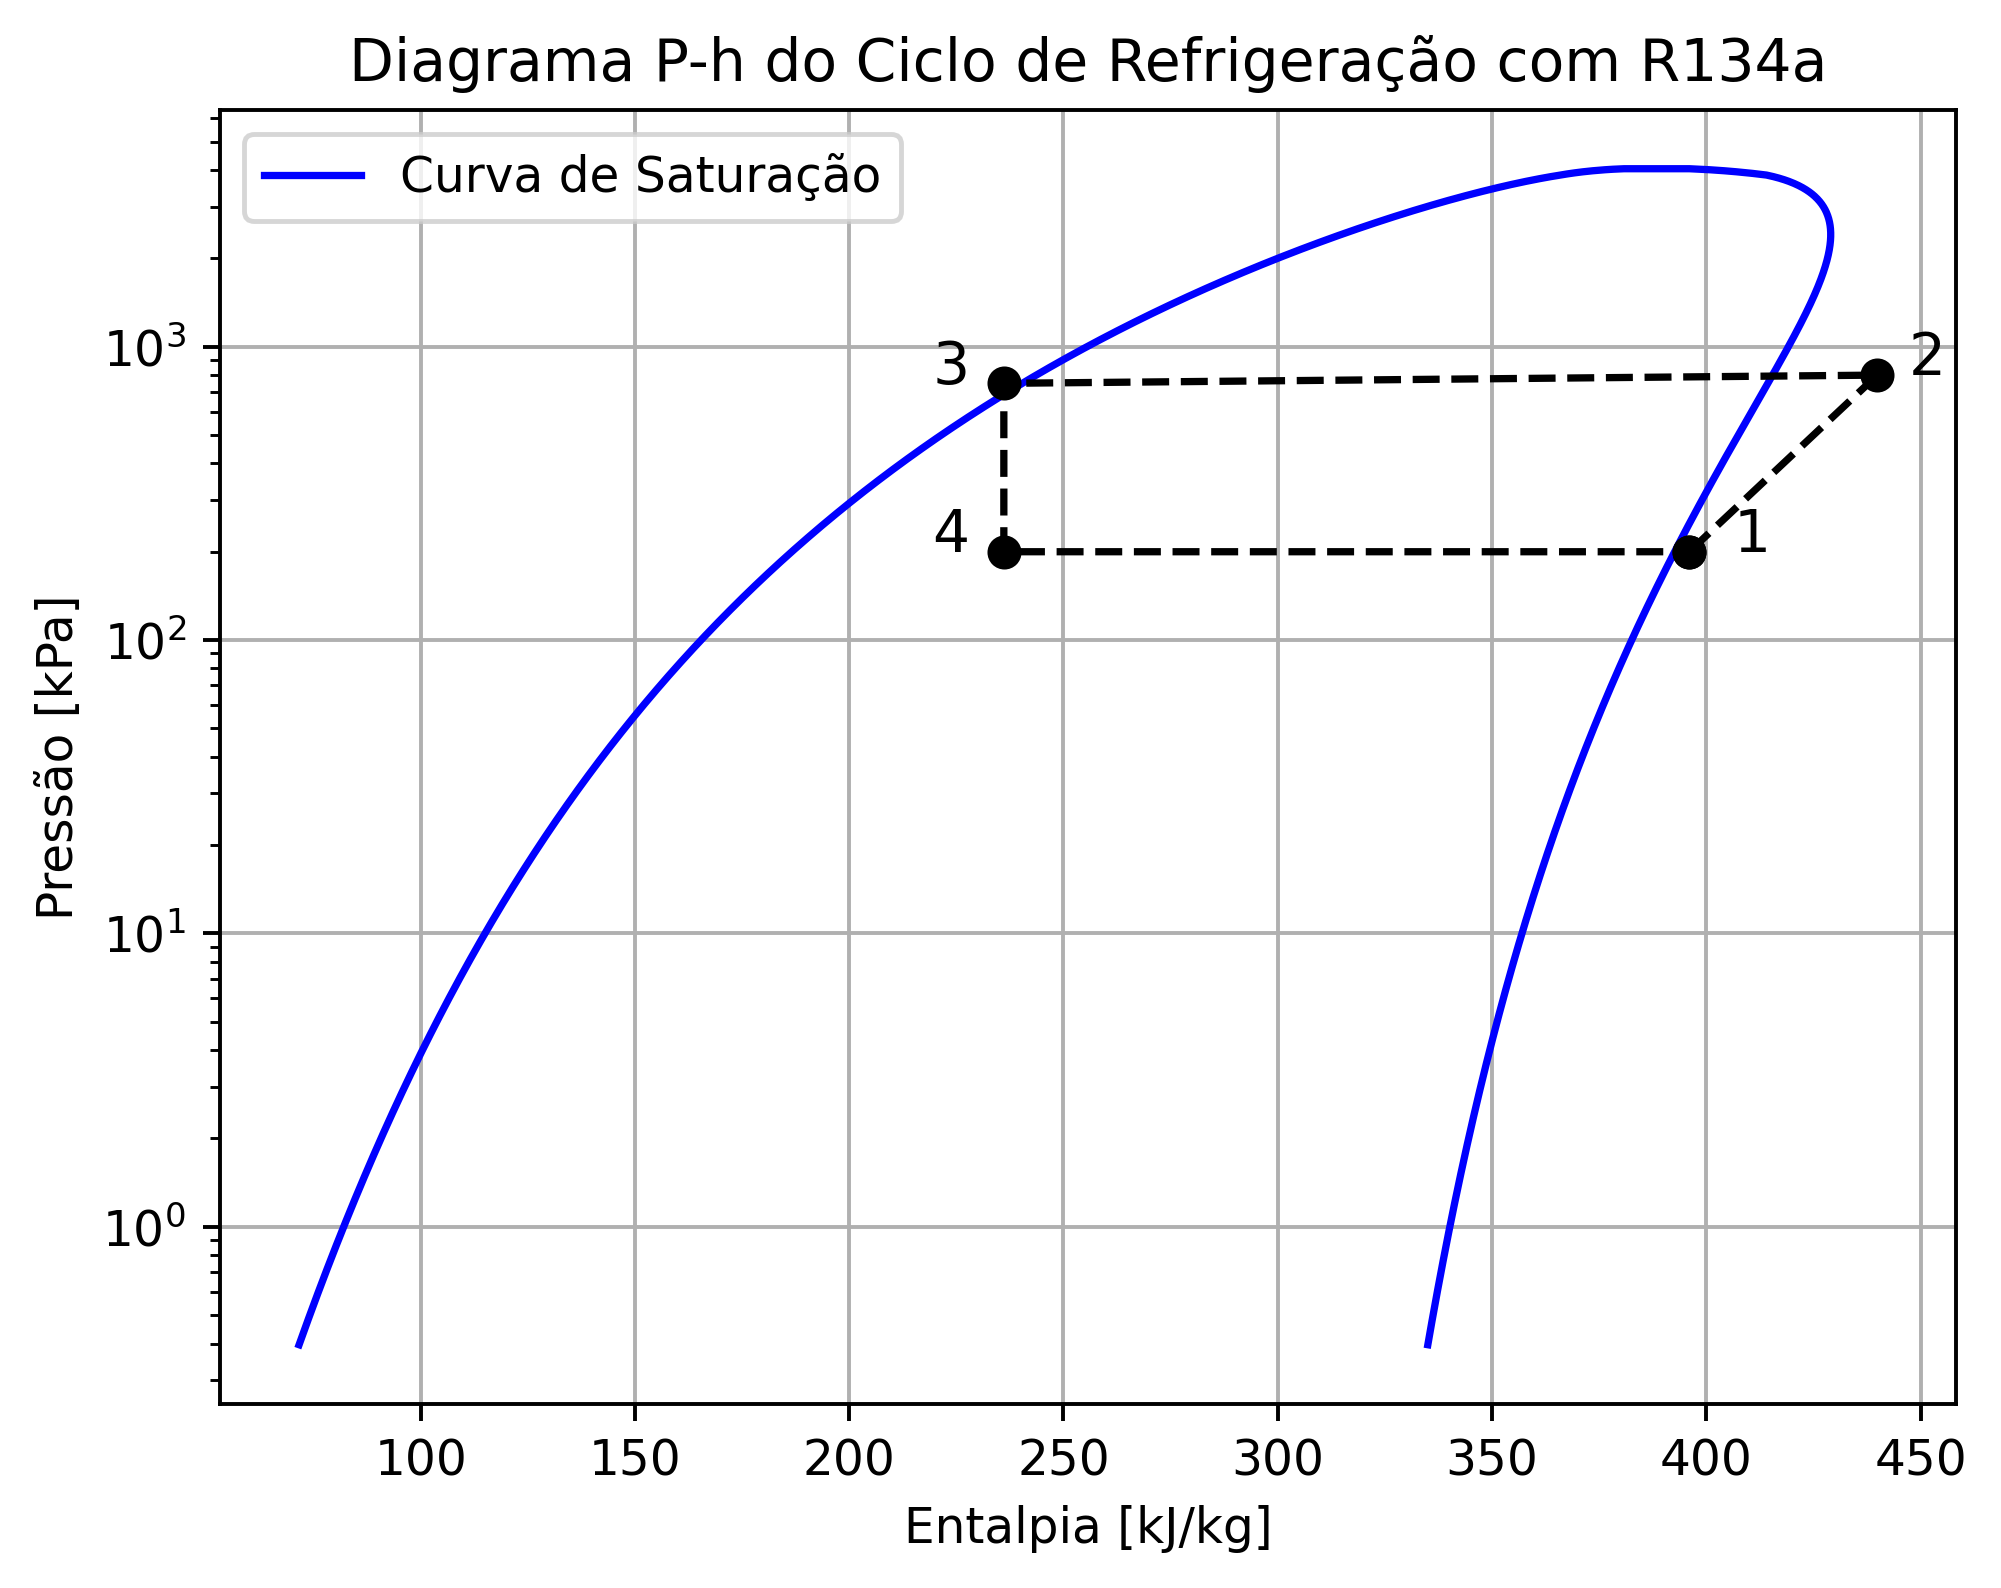

In [42]:
# Definindo os limites de temperatura, incluindo a temperatura crítica
T_min = 170
T_max = 374

# Criando os vetores de temperatura
T_values = np.linspace(T_min, T_max, 1000)  

# Calculando as entalpias de saturação (kJ/kg)
h_liq = [CP.PropsSI('H', 'T', T, 'Q', 0, 'R134a') / 1000 for T in T_values]  # Saturação Líquido
h_vap = [CP.PropsSI('H', 'T', T, 'Q', 1, 'R134a') / 1000 for T in T_values]  # Saturação Vapor

# Calculando as pressões de saturação 
P_values = [CP.PropsSI('P', 'T', T, 'Q', 0, 'R134a') / 1e3 for T in T_values]  

# Criando um vetor de entalpia unificado
h_values = np.concatenate((h_liq, h_vap[::-1]))  # Concatena valores de líquido e vapor
P_values_combined = np.concatenate((P_values, P_values[::-1]))  # Concatena pressão

# Fazendo a plotagem da curva de saturação
plt.figure(dpi=350)
plt.plot(h_values, P_values_combined, label='Curva de Saturação', color='blue')

plt.plot([h1_conv,h2_conv,h3_conv,(h4/1000),h1_conv],
         [P1/1e3, P2/1e3, P3/1e3, P4/1e3, P1/1e3],
         'k--',marker='o',color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(h1_conv + 19, P1 / 1e3, '1', fontsize=12, ha='right', color='black')
plt.text(h2_conv + 16, P2 / 1e3, '2', fontsize=12, ha='right', color='black')
plt.text(h3_conv - 8, P3 / 1e3, '3', fontsize=12, ha='right', color='black')
plt.text(h4/1000 - 8, P4 / 1e3, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama P-h do Ciclo de Refrigeração com R134a')
plt.xlabel('Entalpia [kJ/kg]')
plt.ylabel('Pressão [kPa]')
plt.yscale('log')  # Escala logarítmica para a pressão
plt.grid(True)
plt.legend()
plt.show()

### Taxa de calor fornecida ao ambiente aquecido se a bomba de calor operasse em um ciclo ideal entre os limites de 200 e 800 kPa.

A taxa de rejeição de calor pelo condensador pode ser calculada pela seguinte fórmula:

$$\dot{Q}_{cond} = \dot{m}(h_2 - h_3)$$

Além disso, neste caso, tem-se se as seguintes informações:

$T_{evap} = 200$ kPa

$T_{cond} = 800$ kPa

Para resolver essa etapa do exercício, primeiramente é preciso determinar as entalpias nos estados 2 e 3. Em um ciclo de refrigeração ideal, a transformação que ocorre entre os estados 1 e 2 se dá de maneira isoentrópica, sendo assim s2 = s1. Ademais, sabe-se que a pressão no estado 2 é a pressão de condensação $P_2 = P_{cond}$.

In [43]:
P_evap = 200e3
P_cond = 800e3

In [74]:
# Para descobrir a entalpia em 2 foi passado como parâmetro a pressão de condensação e a entropia do estado 1 que é determinada a partir da pressão de evaporação e do título, que vale 1
h2_l = CP.PropsSI('H','P',P_cond,'S',CP.PropsSI('S','P',P_evap,'Q',1,'R134a'),'R134a')
h2_l_conv = h2_l/1000
display(Math(r'h_{2,ideal} = %.3f kJ/kg'%h2_l_conv))

<IPython.core.display.Math object>

Para descobrir a entalpia no estado 3, é preciso fornecer como parâmetros a pressão, que é a pressão de condensação também, visto que esse processo é considerado como isobárico e o título, que nesse caso vale 0, pois a substância se encontra no estado de líquido saturado.

In [75]:
h3_l = CP.PropsSI('H','P',P_cond,'Q',0,'R134a')
h3_l_conv = h3_l/1000
display(Math(r'h_{3,ideal} = %.3f kJ/kg'%h3_l_conv))

<IPython.core.display.Math object>

In [79]:
Q_cond_2 = m_ponto * (h2_l_conv - h3_l_conv)
display(Math(r'\dot{Q}_{cond,ideal} = %.3f kJ/kg'%Q_cond_2))

<IPython.core.display.Math object>

### COP ideal

O coeficiente de performace pode ser determinado da seguinte forma:

$$  COP = \dfrac{Q_{evap}}{W_{comp}} = \dfrac{\dot{m}(h_1 - h_4)}{\dot{m} (h_2 - h_1)} = \dfrac{h_1 - h_4}{h_2 - h_1} $$

Dessa forma, basta determinar a entalpia no estado 1 para conseguir aplicar a fórmula acima. O estado 1 é caracterizado por ter uma pressão igual a pressão de evaporação e título igual a 1.

In [80]:
h1_l = CP.PropsSI('H', 'P', P_evap, 'Q', 1, 'R134a')
h1_l_conv = h1_l/1000
display(Math(r'h_{1} = %.3f kJ/kg'%h1_l_conv))

<IPython.core.display.Math object>

In [82]:
h4_l = h3_l_conv

COP_2 = (h1_l_conv - h4_l)/(h2_l_conv - h1_l_conv)
display(Math(r'COP_{ideal} = %.3f'%COP_2))

<IPython.core.display.Math object>

### Plotando gráfico P-h

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20376\3987331296.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([H_1_conv, H_2_conv, H_3_conv, H_4_conv, H_1_conv],


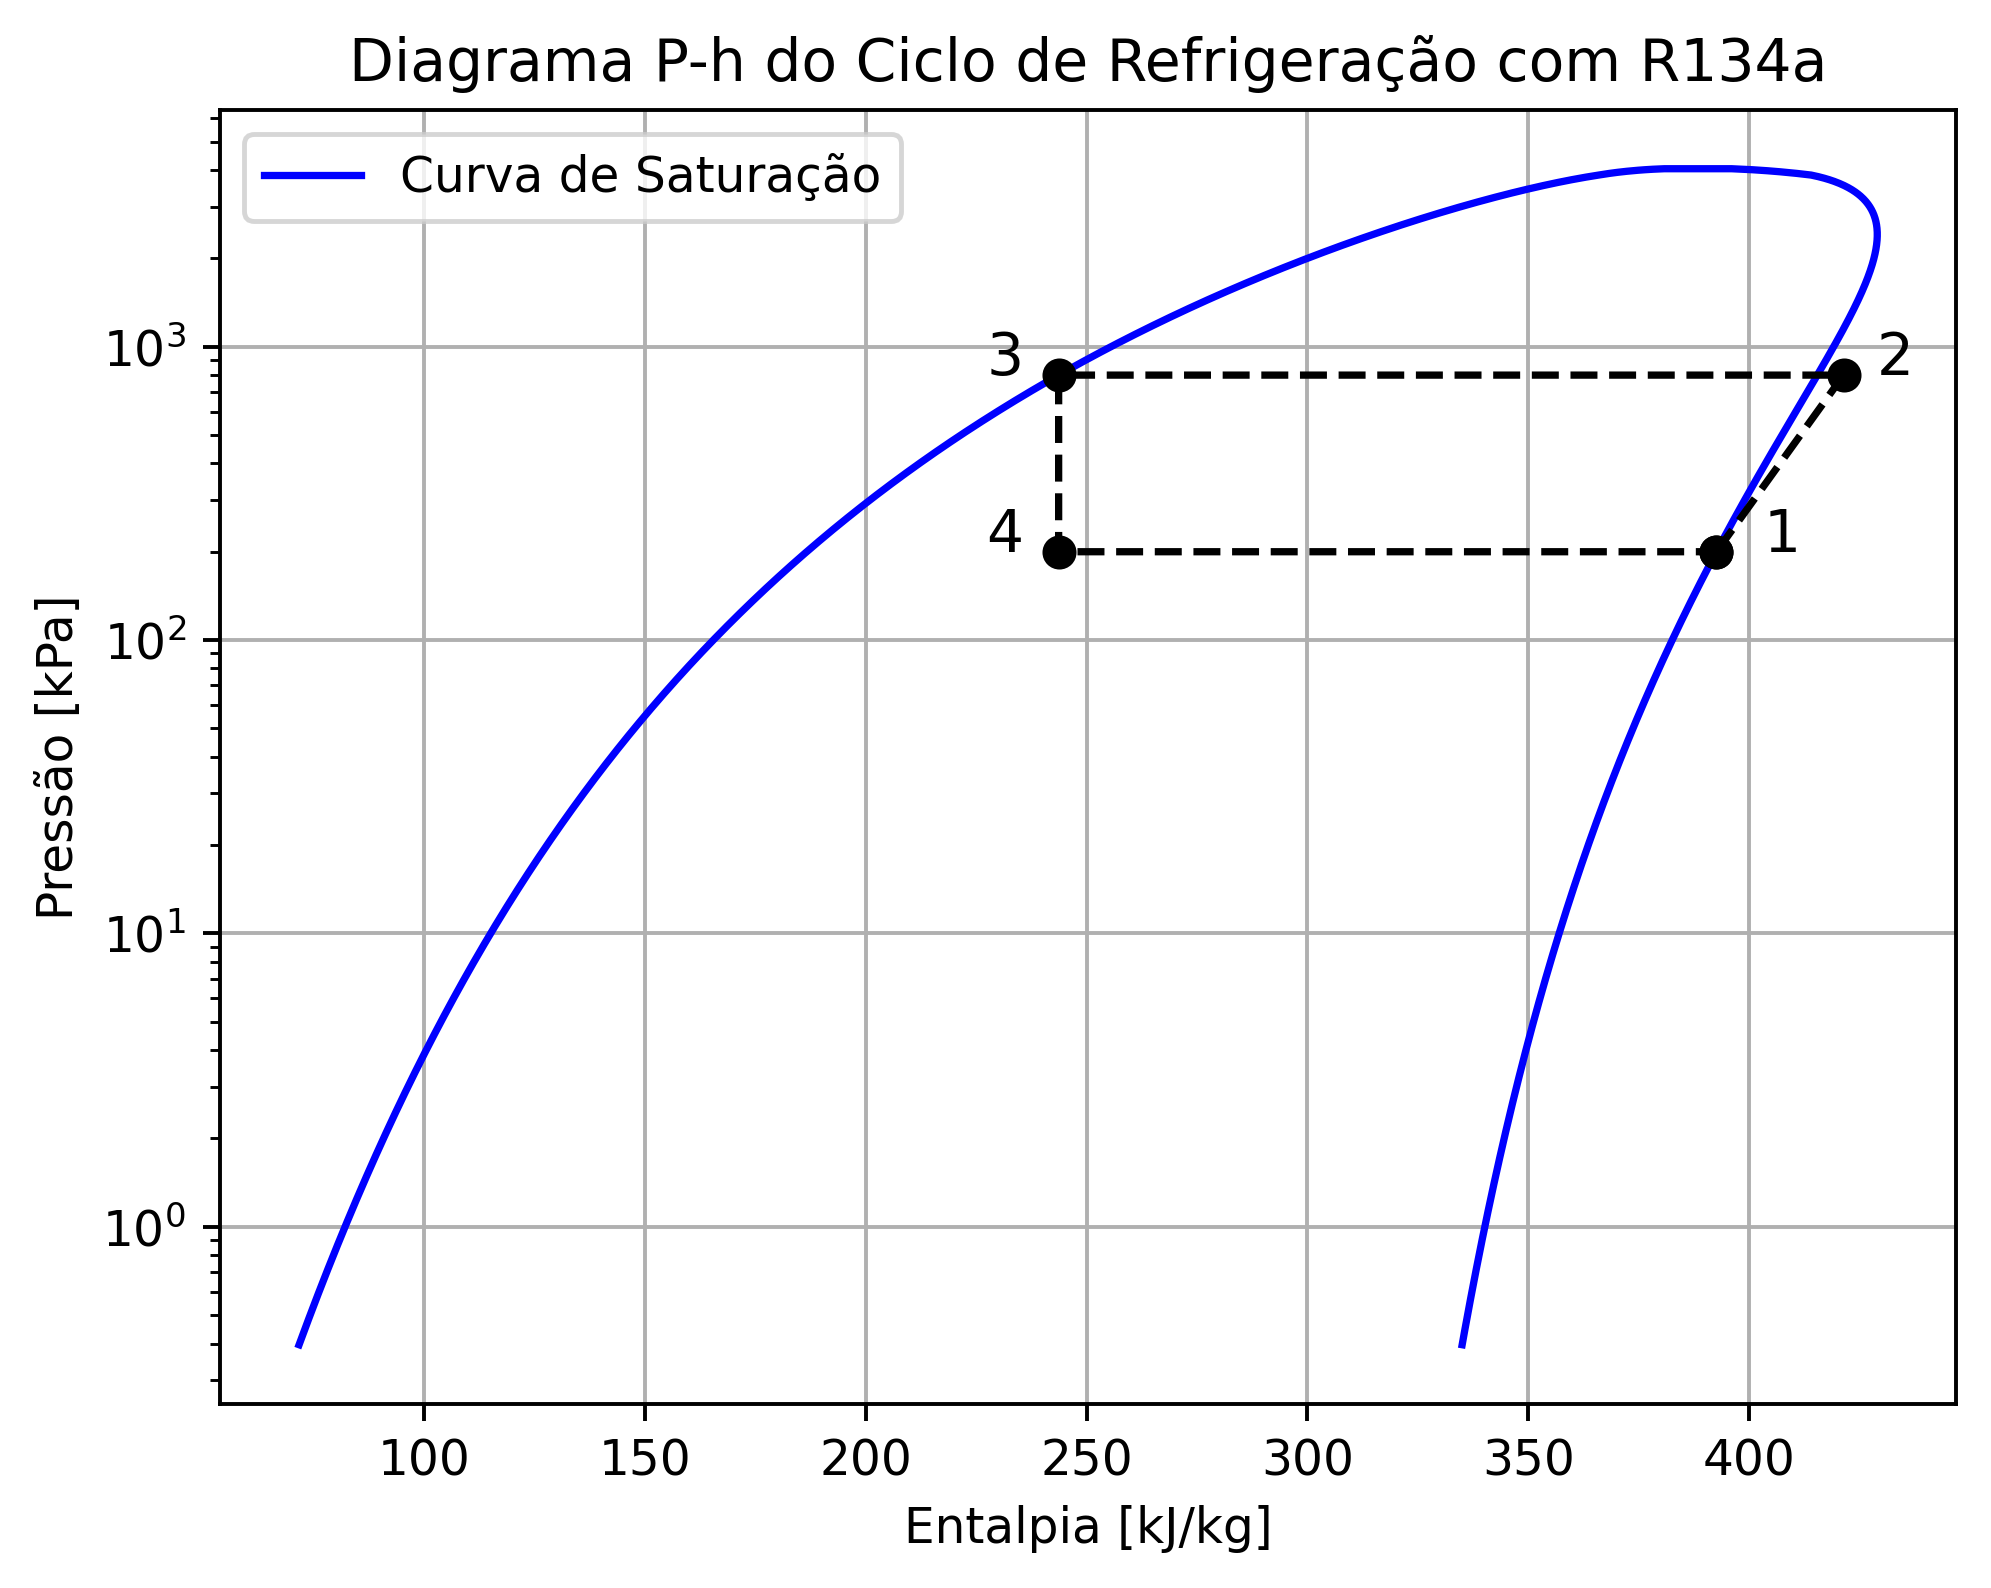

In [49]:
# Definindo os pontos de plotagems
H_1_conv = h1_l_conv  
H_2_conv = h2_l_conv
H_3_conv = h3_l_conv
H_4_conv = H_3_conv  

# Plotagem da curva de saturação
plt.figure(dpi=350)
plt.plot(h_values, P_values_combined, label='Curva de Saturação', color='blue')

# Plotando as linhas e pontos do ciclo
plt.plot([H_1_conv, H_2_conv, H_3_conv, H_4_conv, H_1_conv], 
         [P_evap / 1e3, P_cond / 1e3, P_cond / 1e3, P_evap / 1e3, P_evap / 1e3], 
         'k--', marker='o', color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(H_1_conv + 19, P_evap / 1e3, '1', fontsize=12, ha='right', color='black')
plt.text(H_2_conv + 16, P_cond / 1e3, '2', fontsize=12, ha='right', color='black')
plt.text(H_3_conv - 8, P_cond / 1e3, '3', fontsize=12, ha='right', color='black')
plt.text(H_4_conv - 8, P_evap / 1e3, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama P-h do Ciclo de Refrigeração com R134a')
plt.xlabel('Entalpia [kJ/kg]')
plt.ylabel('Pressão [kPa]')
plt.yscale('log') 
plt.grid(True)
plt.legend()
plt.show()

## Resultados

In [87]:
results = {
    '(a) η_c [%]':[np.round(eta*100,3)],
    '(b) Q_cond [kW] ':[np.round(Q_cond,3)],
    '(c) COP ':[np.round(COP,3)],
    '(d) COP_ciclo ideal':[np.round(COP_2,3)],
    '(d) Q_cond_ciclo ideal [kW]':[np.round(Q_cond_2,3)]

}

results = pd.DataFrame(results)
results.head()

,(a) η_c [%],(b) Q_cond [kW],(c) COP,(d) COP_ciclo ideal,(d) Q_cond_ciclo ideal [kW]
0,6699.28,3.669,4.645,5.174,3.2
